In [1]:
import pandas as pd
import spacy
from spacy import displacy
import numpy as np
import pickle as pk
import json

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
df = pd.read_csv("./data/df_chinese_wong_kei_reviews_train.csv")

In [4]:
df.head(5)

,rating,review,sentiment
0,5,In my younger days when lunch choices consiste...,1
1,3,"After going through yelp and tripadvisor, I wa...",-1
2,5,Ordered Sichuan Prawns and Singapore Rice Nood...,1
3,3,Wong Kei is one of the many options you'll fin...,-1
4,1,One of the worst experience in a restaurant in...,-1


In [5]:
ex=10
print (df["review"][ex])
print ("----------")
doc = nlp(df["review"][ex])  # 2nd sentence
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
          [child for child in token.children])

--- American tourist ----
Wong Kei is A very  typical old fashion Chinatown restaurant. Very old furniture, very working class, not trendy, not cool, "you get the best value here" attitude of service. BUT I highly recommend it!
1. Price is damn good for most chow fun, fried noodles and soup noodles. Cheaper than the United States Chinatown in NY and SF. For other dishes, prices are average NOT cheap.
2. Roast duck is very good but NOT as good as Four Seasons around the corner which still has the BEST duck in London!  Half duck with NO bone is 11.5 pounds at Wong compared to 14.5 pounds with NO bone at Four (number may be off slightly but conclusion is the same). If you want the best duck, go to FOUR.
3. The wonton soup at Wong is average. Soup is meaty, little salty and not clear, not very tasty. Good wonton soup should be clear and strong with seafood (shrimp) taste. Wonton itself is average average although each one has a big piece of shrimp! It could have some MSG in it and it will 

In [6]:
displacy.render(doc, style='dep', jupyter=True, options = { 'distance':80 })

In [7]:
sentt = []
for idno, sentence in enumerate(doc.sents):
    print ('Sentence {}:'.format(idno + 1), sentence)
    sentt.append(sentence)
doc_1 = sentt[1]  # let's use this statement for further analysis

Sentence 1: --- American tourist ----

Sentence 2: Wong Kei is A very  typical old fashion Chinatown restaurant.
Sentence 3: Very old furniture, very working class,
Sentence 4: not trendy, not cool, "you get the best value here" attitude of service.
Sentence 5: BUT I highly recommend it!

Sentence 6: 1.
Sentence 7: Price is damn good for most chow fun, fried noodles and soup noodles.
Sentence 8: Cheaper than the United States Chinatown in NY and SF.
Sentence 9: For other dishes, prices are average NOT cheap.

Sentence 10: 2.
Sentence 11: Roast duck is very good but NOT as good as Four Seasons around the corner which still has the BEST duck in London!  
Sentence 12: Half duck with NO bone is 11.5 pounds at Wong compared to 14.5 pounds with NO bone at Four (number may be off slightly but conclusion is the same).
Sentence 13: If you want the best duck, go to FOUR.

Sentence 14: 3.
Sentence 15: The wonton soup at Wong is average.
Sentence 16: Soup is meaty, little salty and not clear, not 

In [8]:
displacy.render(doc_1, style='dep', jupyter=True, options = { 'distance':80 })

In [9]:
def getRoot(sentence):
    depy=[]
    print ("Input sentence is: " + str(sentence))
    for tok in sentence:
        dep =  (tok.text, tok.dep_, "---> ", tok.head.text)
        print (dep)
        depy.append(dep)
    root = list(filter(lambda x : x[1]=="ROOT", depy))
    if len(root) == 0 : return 999
    return root
  #  print (possible_subject, possible_subject.dep_, possible_subject.head.pos_)
  #  if possible_subject.dep == "nsubj" and possible_subject.head.pos == "VERB":
  #      verbs.add(possible_subject.head)

doc = "John likes an apple"
for sentence in nlp(doc).sents:
    root = getRoot(sentence)
print ("The root is :" + str(root))

Input sentence is: John likes an apple
('John', 'nsubj', '---> ', 'likes')
('likes', 'ROOT', '---> ', 'likes')
('an', 'det', '---> ', 'apple')
('apple', 'dobj', '---> ', 'likes')
The root is :[('likes', 'ROOT', '---> ', 'likes')]


In [10]:
def getTriples(root, sentence):
    depy=[]
    #print (root)
    for tok in sentence:  # tokenize it again
        dep =  (tok.text, tok.dep_, "---> ", tok.head.text)
        depy.append(dep)
    subj = list(filter(lambda x : x[1]=="nsubj", depy))
    #print (subj)
    obj = list(filter(lambda x : x[1]=="dobj", depy))
    #print (obj)
    #print ("root is" + str(root))
    try: 
        triples = (subj[0][0], root[0][0], obj[0][0])
    except IndexError:
        print ("Grammar incorrect. No triples for " + str(sentence))
        print ("Grammar is " + str(depy))
        return None
    return triples

triples=[]
doc = "John likes big apple. The apple tastes delicious."
#doing it sentence by sentence
for sentence in nlp(doc).sents:
    root = getRoot(sentence)  # obtain root of one sentence
    if root != 999 : 
        triple = getTriples(root, sentence)  # obtain triples in that sentence
        print ("Triple is " + str(triple))
   # triples.append(triple)

Input sentence is: John likes big apple.
('John', 'nsubj', '---> ', 'likes')
('likes', 'ROOT', '---> ', 'likes')
('big', 'amod', '---> ', 'apple')
('apple', 'dobj', '---> ', 'likes')
('.', 'punct', '---> ', 'likes')
Triple is ('John', 'likes', 'apple')
Input sentence is: The apple tastes delicious.
('The', 'det', '---> ', 'apple')
('apple', 'nsubj', '---> ', 'tastes')
('tastes', 'ROOT', '---> ', 'tastes')
('delicious', 'dobj', '---> ', 'tastes')
('.', 'punct', '---> ', 'tastes')
Triple is ('apple', 'tastes', 'delicious')


In [11]:
# entity & aspect categories
# From Frequency approach
aspect = {
    "food": [
        "noodles", "food", "dumplings", "dumpling", "pork", "flavour", "chili", "duck",    
        "dishes", "dish", "lunch", "bun", "shrimp", "dimsum", "rice", "chicken", "soup", "chow",
        "msg", "tea", "meal", "drink", "drinks", "eat", "delish", "tasted", "taste", "daal",
        "naan", "flavorful", "tasty", "murgh", "malai", "ruby", "chops", "sandwich",
        "toast", "espresso", "lassi", "breakfast", "breakfasts", "dinner", "cocktails", "cocktail", "whiskey",
        "vegetarian", "biryani", "delicious", "kulfi", "dessert", "desserts", "cuisine", "lentils", "cooked",
        "cook", "seasoned", "kebab", "potatoes", "potato", "lamb", "onion", "onions", "bao", 
        "dim", "cognac", "mai", "bun", "beef", "macaroons", "macaroon"
    ],
    "service" : [
        "staff", "workers", "waiter", "rude", "wait", "waited", "waiting", "water", "queue", "service", 
        "seated", "turn away", "experience", "reservations", "reservation", "bartender"
    ],
    "ambience": [
        "furniture", "bathroom", "decoration", "floors", "tables", "table", "seat", "seating", "flatware",
        "decor", "ambience", "vibe", "crowded", "loud", "ambiance", "design", "interior", "chic", "modern",
        "atmosphere"
    ],
    "price" : ["price", "prices", "priced", "cost", "cheap", "cheaper", "expensive"]
}
# overall : will be everything else    
# Helper function for categorising aspects:
def aspectCat(sentence):
    category=[]
    for tok in sentence:
        tok = tok.text.lower()
        for key, val in aspect.items():
            if tok in val: category.append(key)
    if len(category) == 0 : category.append("overall")
    return category

In [12]:
reviews_sent =[] 
# reloading vectoriser & svm classifier
# note it is important that the classifier is trained on the vectoriser and so is the test set
vectorizer = pk.load(open("./models/vectorise.pk","rb"))
classifier_svm = pk.load(open("./models/classifier_svm.pk", "rb"))  # load the previously trained SVM classifier

def getSentiment(span):
    res = 0.0
    # print (span)
    test_transform = vectorizer.transform([span.text])
    res=classifier_svm.predict(test_transform)
    # print(res)
    return res

ex=40
doc = nlp(df["review"][ex])
for idx, sentence in enumerate(doc.sents):
    # print(sentence)
    res = getSentiment(sentence)
    try:
        cat = aspectCat(sentence)      
        reviews_sent.append({"scores":list(res), "text":sentence, "category":cat})
    except IndexError:
        # there are no specific aspects talked about. Just in general
        reviews_sent.append({"scores":list(res), "text":sentence, "category":"overall"})
print(reviews_sent)

/Users/davidleonardi/anaconda3/lib/python3.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/davidleonardi/anaconda3/lib/python3.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/davidleonardi/anaconda3/lib/python3.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator SVC from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


[{'scores': [1], 'text': I admit it, I go to Wong Kei... and I LIKE it!
, 'category': ['overall']}, {'scores': [-1], 'text': So they closed and reopened, and some things have changed., 'category': ['overall']}, {'scores': [1], 'text': The prices went up a little (not by that much), although the portions are the same, the staff got a little friendlier and service just a tad slower., 'category': ['price', 'service', 'service']}, {'scores': [1], 'text': But what's important remains the same., 'category': ['overall']}, {'scores': [-1], 'text': It's a place where you can get a plate of relatively good Chinese food quickly for not a lot of money., 'category': ['food']}, {'scores': [1], 'text': It's by no means the best food in the world but it is at a price that's cheaper, 'category': ['food', 'price', 'price']}, {'scores': [-1], 'text': that the rest. 
, 'category': ['overall']}, {'scores': [-1], 'text': By all means go to the buffets in Chinatown, but unless you eat smart, you're losing ou

In [13]:
reviews = {}
for i in range(len(df["review"])):
    doc = nlp(df["review"][i])
    reviews_sent =[] 
    for idx, sentence in enumerate(doc.sents):
        #print (sentence)
        res = str(getSentiment(sentence))
        try:
            cat = aspectCat(sentence)      
            reviews_sent.append({"scores":res, "text":sentence.text, "category":cat})
        except IndexError:
            reviews_sent.append({"scores":res, "text":sentence.text, "category":"overall"})
    reviews[i]=reviews_sent

# set of all reviews
fname = "./data/dependency_parsing/dp_chinese_wong_kei_reviews.json"
ffile = open(fname, "w")
json.dump(reviews, ffile)
ffile.close()
#print (reviews)

print ("-----------")

# summarise all reviews
summary_scores = {"overall":[], "service":[], "price":[], "food":[], "ambience": []}
# count total no of 
for key, val in reviews.items():
    #print (val)
    for i in val:
        score = eval(i["scores"])[0]
        summary_scores[i["category"][0]].append(score)

# print (summary_scores)
for key, val in summary_scores.items():
    #avg = round(np.mean(val),2)
    pos = np.sum(np.array(val) >= 0, axis=0)
    neg = np.sum(np.array(val) < 0, axis=0)
   # print (val)
   # try:
   #     nb = len(val)
   # except TypeError                                  :
    #    nb = 1
    summary_scores[key]={"pos":pos,"neg": neg, "nb talked": pos + neg}
#summary_scores["total no of reviews"]=len(reviews)
print (summary_scores)
df_summary = pd.DataFrame(summary_scores)

-----------
{'overall': {'pos': 357, 'neg': 405, 'nb talked': 762}, 'service': {'pos': 84, 'neg': 168, 'nb talked': 252}, 'price': {'pos': 63, 'neg': 45, 'nb talked': 108}, 'food': {'pos': 269, 'neg': 248, 'nb talked': 517}, 'ambience': {'pos': 49, 'neg': 44, 'nb talked': 93}}


In [14]:
df_summary = pd.DataFrame(summary_scores )

df_summary=df_summary.transpose()
df_summary.columns=[ "total", "negative", "positive"]
df_summary["category"] = df_summary.index
df_summary.append(pd.Series([1,2,3,"dummy"]),ignore_index = True)
print(df_summary)

          total  negative  positive  category
overall     762       405       357   overall
service     252       168        84   service
price       108        45        63     price
food        517       248       269      food
ambience     93        44        49  ambience


          total  negative  positive  category
ambience     93        44        49  ambience
price       108        45        63     price
service     252       168        84   service
food        517       248       269      food
overall     762       405       357   overall


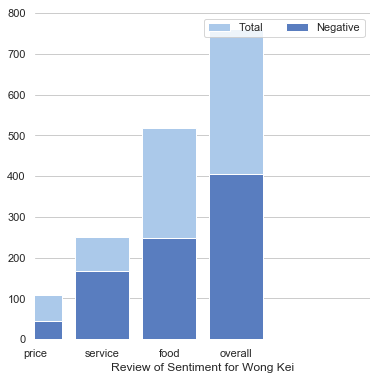

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))
df_summary = df_summary.sort_values("total")
print(df_summary)
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="category", y="total", data=df_summary,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="category", y="negative", data=df_summary,
            label="Negative", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(1, 6), ylabel="",
       xlabel="Review of Sentiment for Wong Kei")
sns.despine(left=True, bottom=True)